# Homework 5

## 1. Data

First, since the dataset is really large, we try to read just some of the rows to see which are the columns and how the information are stored. In this way we will know which columns are necessary to take for the ceration of the Citation Graph and Collaboration Graph.

In [2]:
import ijson
import pandas as pd

#Initializing an empty list to store data
data_short = []

#Opening the JSON file for reading in binary mode
with open(r"dblp.v12.json", "rb") as file:
    #Using ijson library to parse JSON items from the file
    objects = ijson.items(file, "item")

    #Iterating over the items in the JSON file
    for i, obj in enumerate(objects):
        #Break the loop after processing 1000 items (change as needed)
        if i == 1000:
           break

        #Appending the current JSON item to the data list
        data_short.append(obj)

df_short = pd.DataFrame(data_short)

Now we visualize the riducted dataset.

In [3]:
df_short

,id,authors,title,year,n_citation,page_start,page_end,doc_type,publisher,volume,issue,doi,references,indexed_abstract,fos,venue
0,1091,"[{'name': 'Makoto Satoh', 'org': 'Shinshu Univ...",Preliminary Design of a Network Protocol Learn...,2013,1,89,93,Conference,"Springer, Berlin, Heidelberg",,,10.1007/978-3-642-39476-8_19,"[2005687710, 2018037215]","{'IndexLength': 58, 'InvertedIndex': {'tool.':...","[{'name': 'Telecommunications network', 'w': 0...",{'raw': 'International Conference on Human-Com...
1,1388,"[{'name': 'Pranava K. Jha', 'id': 2718958994}]",Further Results on Independence in Direct-Prod...,2000,1,,,Journal,,56,,,NaN,NaN,"[{'name': 'Graph', 'w': 0.0}, {'name': 'Discre...","{'raw': 'Ars Combinatoria', 'id': 73158690, 't..."
2,1674,"[{'name': 'G. Beale', 'org': 'Archaeological C...",A methodology for the physically accurate visu...,2011,1,137,144,Conference,Eurographics Association,,,10.2312/VAST/VAST11/137-144,"[1535888970, 1992876689, 1993710814, 203565334...","{'IndexLength': 201, 'InvertedIndex': {'illust...","[{'name': 'Statue', 'w': 0.40216}, {'name': 'E...",{'raw': 'International Conference on Virtual R...
3,1688,"[{'name': 'Altaf Hossain', 'org': 'Department ...","Comparison of GARCH, Neural Network and Suppor...",2009,6,597,602,Conference,"Springer, Berlin, Heidelberg",,,10.1007/978-3-642-11164-8_97,"[1560724230, 1986968751, 2156909104]","{'IndexLength': 64, 'InvertedIndex': {'standar...",[{'name': 'Autoregressive–moving-average model...,{'raw': 'Pattern Recognition and Machine Intel...
4,5411,"[{'name': 'Rafael Álvarez', 'id': 2125293936},...",COMPARING GNG3D AND QUADRIC ERROR METRICS METH...,2009,0,99,102,Conference,,,,,NaN,NaN,"[{'name': 'Computer vision', 'w': 0.44692}, {'...",{'raw': 'International Conference on Computer ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,875054,"[{'name': 'Maazen Alsabaan', 'org': 'Universit...",Geocast Routing in Vehicular Networks for Redu...,2011,7,26,40,Conference,"Springer, Berlin, Heidelberg",,,10.1007/978-3-642-23447-7_4,"[2101963262, 2136758263, 2144113407, 216268564...","{'IndexLength': 201, 'InvertedIndex': {'been':...","[{'name': 'Global warming', 'w': 0.4402}, {'na...",{'raw': 'International Conference on Informati...
996,875060,"[{'name': 'Frank Wolter', 'org': 'Institut für...",Spatial reasoning in RCC-8 with Boolean region...,2000,53,244,248,Conference,IOS Press,,,,"[852874, 1525985171, 1551609000, 1568262744, 1...","{'IndexLength': 90, 'InvertedIndex': {'but': [...","[{'name': 'Spatial intelligence', 'w': 0.49212...",{'raw': 'European Conference on Artificial Int...
997,876431,"[{'name': 'Apostolos P. Fournaris', 'org': 'Un...",Trust Management Through Hardware Means: Desig...,2011,7,31,45,Conference,"Springer, Dordrecht",,,10.1007/978-94-007-1488-5_3,"[118467740, 1730333074, 1881737672, 1969042806...","{'IndexLength': 210, 'InvertedIndex': {'very':...","[{'name': 'Trusted third party', 'w': 0.53136}...",{'raw': 'IEEE Computer Society Annual Symposiu...
998,876610,"[{'name': 'Hans H. K. Andersen', 'id': 2132304...",Evaluation of an e-commerce Agent.,2002,0,64,70,Conference,,,,,NaN,NaN,"[{'name': 'Commerce', 'w': 0.39993}, {'name': ...",{'raw': 'International Conference on Artificia...


As we can see we have 16 columns and we are interested in particular in: "id", "authors", "n_citation" and "references". Since the file is really large, we take just some of the columns and we also add the following columns to have complete information: "title", "doc_type" and "doi".

In [4]:
import ijson
import pandas as pd
import numpy as np


#Path of the file
json_file_path = r"dblp.v12.json"

#Initializing the DATA variable
DATA = [] 
with open(json_file_path, "rb") as file:
    objects = ijson.items(file, "item")
    for i, element in enumerate(objects):
        data = {}

        #Extracting 'id' from the element
        data['id'] = element['id']

        #Extracting 'authors' from the element
        authors = element.get('authors', {})
        data['authors'] = authors


        #Extracting 'title' from the element
        data['title'] = element['title']

        #Extracting 'year' from the element or set to NaN if not present
        year = element.get('year')
        data['year'] = year if year else np.nan

        #Extracting 'n_citation' from the element or set to 0 if not present
        n_citation = element.get('n_citation')
        data['n_citation'] = element['n_citation'] if n_citation else 0

        #Extracting 'doc_type' from the element or set to NaN if not present
        doc_type = element.get('doc_type')
        data['doc_type']= element['doc_type'] if doc_type else np.nan

        #Extracting 'references' from the element, join them with ';' if present, or set to NaN if not present
        references = element.get('references')
        data['references'] = ';'.join([str(int(r)) for r in references]) if references else np.nan
        
        #Appending the extracted data to the DATA list
        DATA.append(data)

#Creating the dataframe
df = pd.DataFrame(DATA)


Now we visualize the dataset.

In [5]:
df.head(10)

,id,authors,title,year,n_citation,doc_type,references
0,1091,"[{'name': 'Makoto Satoh', 'org': 'Shinshu Univ...",Preliminary Design of a Network Protocol Learn...,2013.0,1,Conference,2005687710;2018037215
1,1388,"[{'name': 'Pranava K. Jha', 'id': 2718958994}]",Further Results on Independence in Direct-Prod...,2000.0,1,Journal,NaN
2,1674,"[{'name': 'G. Beale', 'org': 'Archaeological C...",A methodology for the physically accurate visu...,2011.0,1,Conference,1535888970;1992876689;1993710814;2035653341;20...
3,1688,"[{'name': 'Altaf Hossain', 'org': 'Department ...","Comparison of GARCH, Neural Network and Suppor...",2009.0,6,Conference,1560724230;1986968751;2156909104
4,5411,"[{'name': 'Rafael Álvarez', 'id': 2125293936},...",COMPARING GNG3D AND QUADRIC ERROR METRICS METH...,2009.0,0,Conference,NaN
5,5781,"[{'name': 'Jovan Dj. Golic', 'id': 1237859792}...",Vectorial fast correlation attacks.,2004.0,2,Repository,NaN
6,6522,"[{'name': 'Güzin Ulutas', 'org': 'Karadeniz Te...",Improved Secret Image Sharing Method By Encodi...,2011.0,0,Conference,2007942710;2040446335;2042901705;2138296484
7,6762,"[{'name': 'Pranay Chaudhuri', 'id': 2142249029...",A Self-Stabilizing Algorithm for Finding the C...,2003.0,0,Conference,NaN
8,8373,"[{'name': 'Phan Cong Vinh', 'org': 'Department...",Formal agent-oriented ubiquitous computing: a ...,2012.0,0,Conference,141500162;1977736041;2057072261;2495388083;261...
9,8763,"[{'name': 'Dominik Szajerman', 'org': 'Lodz Un...",Fur Visualisation for Computer Game Engines an...,2014.0,0,Conference,2002239941;2062162286;2114709034


We can see that there are a lot of NaNs, so we delete the NaNs from the columns 'id', 'authors', 'references'.

In [6]:
#Eliminating NaNs values
df = df.dropna(subset=['id'])
df = df.dropna(subset=['authors'])
df = df.dropna(subset=['references'])

#Eliminating the duplicates from the column 'id'
df = df.drop_duplicates(subset=['id'])

In [7]:
#Visualizing the new dataset
df.head(10)

,id,authors,title,year,n_citation,doc_type,references
0,1091,"[{'name': 'Makoto Satoh', 'org': 'Shinshu Univ...",Preliminary Design of a Network Protocol Learn...,2013.0,1,Conference,2005687710;2018037215
2,1674,"[{'name': 'G. Beale', 'org': 'Archaeological C...",A methodology for the physically accurate visu...,2011.0,1,Conference,1535888970;1992876689;1993710814;2035653341;20...
3,1688,"[{'name': 'Altaf Hossain', 'org': 'Department ...","Comparison of GARCH, Neural Network and Suppor...",2009.0,6,Conference,1560724230;1986968751;2156909104
6,6522,"[{'name': 'Güzin Ulutas', 'org': 'Karadeniz Te...",Improved Secret Image Sharing Method By Encodi...,2011.0,0,Conference,2007942710;2040446335;2042901705;2138296484
8,8373,"[{'name': 'Phan Cong Vinh', 'org': 'Department...",Formal agent-oriented ubiquitous computing: a ...,2012.0,0,Conference,141500162;1977736041;2057072261;2495388083;261...
9,8763,"[{'name': 'Dominik Szajerman', 'org': 'Lodz Un...",Fur Visualisation for Computer Game Engines an...,2014.0,0,Conference,2002239941;2062162286;2114709034
10,9415,"[{'name': 'Ankita Brahmachari', 'org': 'Depart...",Identifying Psychological Theme Words from Emo...,2013.0,0,Conference,7678345;2032031606;2065586386;2079521622
12,11796,"[{'name': 'Magnus Mähring', 'org': 'Stockholm ...",The Role of the Board of Directors in IT Gover...,2006.0,13,Conference,130486177;1526421749;1539089137;1576280218;175...
15,13070,"[{'name': 'Efthymios Alepis', 'org': 'Departme...",Knowledge Engineering for Affective Bi-Modal I...,2008.0,2,Conference,113189947;1521160879;1592800357;1846370229;201...
16,13205,"[{'name': 'Milos Zelezný', 'id': 2404438944}, ...",Design of an audio-visual speech corpus for th...,2002.0,4,Conference,86048793;1584320209;1921940208;2096518980


We now store the new dataframe in a csv file to simplify future reading of the dataset

In [ ]:
#df.to_csv('df_csv.csv', index=False)

In [3]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

#Read the CSV file into a DataFrame
df = pd.read_csv('df_csv.csv')

In [4]:
df.head()

,id,authors,title,year,n_citation,doc_type,references
0,1091,"[{'name': 'Makoto Satoh', 'org': 'Shinshu Univ...",Preliminary Design of a Network Protocol Learn...,2013.0,1,Conference,2005687710;2018037215
1,1674,"[{'name': 'G. Beale', 'org': 'Archaeological C...",A methodology for the physically accurate visu...,2011.0,1,Conference,1535888970;1992876689;1993710814;2035653341;20...
2,1688,"[{'name': 'Altaf Hossain', 'org': 'Department ...","Comparison of GARCH, Neural Network and Suppor...",2009.0,6,Conference,1560724230;1986968751;2156909104
3,6522,"[{'name': 'Güzin Ulutas', 'org': 'Karadeniz Te...",Improved Secret Image Sharing Method By Encodi...,2011.0,0,Conference,2007942710;2040446335;2042901705;2138296484
4,8373,"[{'name': 'Phan Cong Vinh', 'org': 'Department...",Formal agent-oriented ubiquitous computing: a ...,2012.0,0,Conference,141500162;1977736041;2057072261;2495388083;261...


Now we sort the dataset based on the number of citation to select the top 10000 papers with the highest number of citations.

In [5]:
import ast

#Sorting the DataFrame based on the number of citations in descending order
df_sorted = df.sort_values(by='n_citation', ascending=False)

#Selecting the top 10,000 papers from the sorted DataFrame
sub_df = df_sorted.head(10000)

# Transforn the value of column 'authors' into a list of dictionaries
sub_df['authors'] = sub_df['authors'].apply(ast.literal_eval) 

In [6]:
#Visualizing the selected dataset
sub_df.head()

,id,authors,title,year,n_citation,doc_type,references
2446184,2151103935,"[{'name': 'David G. Lowe', 'org': 'Computer Sc...",Distinctive Image Features from Scale-Invarian...,2004.0,35541,Journal,19720318;1541642243;1560959218;1676552347;1681...
3298201,2911964244,"[{'name': 'Leo Breiman', 'org': 'Statistics De...",Random Forests,2001.0,34741,NaN,1507255258;1580948147;1605688901;1975846642;20...
2225037,2153635508,"[{'name': 'Chih-Chung Chang', 'org': 'National...",LIBSVM: A library for support vector machines,2011.0,31047,Journal,1510526001;1543810117;1556115774;1568793342;16...
502478,1791587663,"[{'name': 'Fred D. Davis', 'org': 'Computer an...","Perceived usefulness, perceived ease of use, a...",1989.0,25855,Journal,157213131;1520103841;1778357938;1972888601;197...
1880225,2119821739,"[{'name': 'Corinna Cortes', 'org': 'AT&T Bell ...",Support-Vector Networks,1995.0,22276,Journal,2087347434;2154579312;2168228682


We can create the Citation Graph following the task: considering the reduced dataset of the top 10000 papers that we call `sub_df`, the nodes are the papers of this dataset and the edges are the citations of it.
This graph is direct and unweighted.

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

#Initializing a directed Multigraph
citation_graph = nx.DiGraph()

#Creating a set of IDs from our new DataFrame
df_ids_set = set(sub_df['id'])

# Adding nodes to the graph based on the set of ids
for node_id in df_ids_set:
    citation_graph.add_node(int(node_id))

#Iterating over the top 10,000 papers in the reduced DataFrame (sub_df) and add edges
for index, paper in sub_df.iterrows():
    #Splitting references and remove leading/trailing whitespaces
    if pd.notna(paper['references']):
        references = paper['references'].split(';')
        references = [int(ref.strip()) for ref in references if ref] # create a list of int corrisponding to the paper ids referenced by the current paper

        # Add the edge between current node and referenced nodes only if the referenced node is contained in our subset of the original dataframe
        citation_graph.add_edges_from([(paper['id'], ref) for ref in references if ref in df_ids_set])


Now we save the Citation Graph to a edgeslist file format.

In [8]:
#Saving the citation graph to a edgeslist format
nx.write_edgelist(citation_graph, 'citation_graph.edgelist', data=False)

The other type of graph is the Collaboration Graph. Here, the nodes are the authors and the edges are the collaborations between the authors of the top 10000 papers.
Since the column 'authors' is composed by a dictionaries with general information about the authors, we create a function that takes just the name of the author.

In [9]:
def extract_authors(authors_list):
    #Extracting author names from a list of author information
    author_names = []
    for author_info in authors_list:
        if 'name' in author_info:
            author_names.append(author_info['name'])
    return author_names


In [10]:
#Applying the extraction function to authors in the extracted DataFrame
sub_df['author_names'] = sub_df['authors'].apply(extract_authors)

In [11]:
sub_df['author_names'].head(10)

2446184                                  [David G. Lowe]
3298201                                    [Leo Breiman]
2225037                 [Chih-Chung Chang, Chih-Jen Lin]
502478                                   [Fred D. Davis]
1880225                [Corinna Cortes, Vladimir Vapnik]
1712348                        [Heng Li, Richard Durbin]
1944406    [K. Deb, A. Pratap, S. Agarwal, T. Meyarivan]
2147920          [Fredrik Ronquist, John P. Huelsenbeck]
2137581                                     [John Canny]
2310011                            [N. Dalal, B. Triggs]
Name: author_names, dtype: object

Now we can implement the Collaboration Graph.

In [12]:
import networkx as nx
import matplotlib.pyplot as plt
import itertools

#Creating an undirected and weighted graph
collaboration_graph = nx.Graph()

#Iterating over the top 10,000 papers in the reduced DataFrame (sub_df)
for index, paper in sub_df.iterrows():
    
    #Adding authors as nodes to the graph
    collaboration_graph.add_nodes_from(paper['author_names'])


    # Adding weighted edges between authors (all combinations)
    author_pairs = itertools.combinations(paper['author_names'], 2)  # generates combinations of size 2 without repetition
    
    for author1, author2 in author_pairs:

        if collaboration_graph.has_edge(author1, author2):
            # Adding weight if the edge already exists
            collaboration_graph[author1][author2]['weight'] += 1
            # Adding paper ID to the list of papers
            collaboration_graph[author1][author2]['papers'].append(paper['id'])
        else:
            # Creating a new edge with weight 1 and a list of paper IDs
            collaboration_graph.add_edge(author1, author2, weight=1, papers=[paper['id']])
    


## 2. Controlling system

### 2.1. Backend Implementation

In [13]:
import networkx as nx
import numpy as np

#### Functionality 1 - Graph's features


Input:
- The graph
- The name of the graph

Output:
- The number of the nodes in the graph
- The number of the edges in the graph
- The graph density
- The graph degree distribution
- The average degree of the graph
- The graph hubs (hubs are nodes having degrees more extensive than the 95th percentile of the degree distribution)
- Whether the graph is dense or sparse

In [14]:
def functionality_1(graph, graph_name):

    # Use assert to check if the graph name is "citation_graph" or "collaboration_graph"
    assert graph_name == "citation_graph" or graph_name == "collaboration_graph", "choose 'citation_graph' or 'collaboration_graph' as second input value"
    
    # compute the number of NODES 
    num_nodes = graph.number_of_nodes()

    # compute the number of EDGES
    num_edges = graph.number_of_edges()

    # compute the DENSITY of the graph (use networkx so we don't have to distinguish if the graph is directed or undirected)
    density = nx.density(graph)

    # compute the DEGREE DISTRIBUTION
    if graph_name == "collaboration_graph":
        degree_distribution = nx.degree_histogram(graph) # use the predefined method
        
    else: # the graph is directed
        in_degrees = dict(graph.in_degree()) # create a dictionary of nodes as keys and in-degree as values
        out_degrees = dict(graph.out_degree()) # create a dictionary of nodes as keys and out-degree as values

        # initialize two empty list to create the histograms
        indegree_distribution = np.zeros(max(in_degrees.values())+1)
        outdegree_distribution = np.zeros(max(out_degrees.values())+1)

        for degree in in_degrees.values():
            indegree_distribution[degree] += 1
        
        for degree in out_degrees.values():
            outdegree_distribution[degree] += 1
        
        degree_distribution = (indegree_distribution, outdegree_distribution) # return two lists, one for in-degree and one fot out-degree


    # compute the AVERAGE DEGREE
    node_degrees = dict(graph.degree()) # create a dictionary where the key is the node and the value is its degree
    average_degree = sum(node_degrees.values()) / num_nodes # sum up all the degrees and divide by number of nodes

    # compute the GRAPH HUBS 
    node_degrees = dict(graph.degree()) # create a dictionary where the key is the node and the value is its degree
    # calculate the 95th percentil of the degree distribution
    degree_values = list(node_degrees.values())
    percentile_95 = np.percentile(degree_values, 95)
    # find Hubs
    hubs = [node for node, degree in node_degrees.items() if degree > percentile_95] # list containing only nodes with degree greater than the 95th percentile

    # compute wheter the graph is DENSE or SPARSE
    threshold = 0.5 # we use the following convention: if the density is less than the chosen threshold the graph is sparse, otherwise is dense
    if density <= threshold:
        sparse_or_dense = "sparse"
    else:
        sparse_or_dense = "dense"

    return(graph_name, num_nodes, num_edges, density, degree_distribution, average_degree, hubs, sparse_or_dense)


#### Functionality 2 - Nodes' contribution


Input:
- The graph
- A node of the graph (paper/author)
- The name of the graph

Output:
The centrality of the node, calculated based on the following centrality measurements:
- Betweeness
- PageRank
- ClosenessCentrality
- DegreeCentrality

In [15]:
def functionality_2(graph, node, graph_name):

    # Use assert to check if the graph name is "citation_graph" or "collaboration_graph"
    assert graph_name == "citation_graph" or graph_name == "collaboration_graph", "choose 'citation_graph' or 'collaboration_graph' as second input value"

    # Use assert to check if the node is a node of the graph
    assert node in graph.nodes, f"The node {node} is not in the graph"

    # Betweenness Centrality
    betweenness_centrality = nx.betweenness_centrality(graph)[node]

    # PageRank Centrality
    pagerank_centrality = nx.pagerank(graph)[node]

    # Closeness Centrality
    closeness_centrality = nx.closeness_centrality(graph)[node]

    # Degree Centrality
    degree_centrality = nx.degree_centrality(graph)[node]

    # return the node, the graph_name to simplify future reading and the computed centrality metrics
    return (node, graph_name, betweenness_centrality, pagerank_centrality, closeness_centrality, degree_centrality)

#### Functionality 3 - Shortest ordered walk

Input:
- The graph data
- A sequence of authors_a = [a_2, ..., a_{n-1}]
- Initial node a_1 and an end node a_n
- N: denoting the top authors whose data should be considered

Output:
- The shortest walk of collaborations you need to read to get from author a_1 to author a_n and the papers you need to cross to realize this walk.

Considerations: For this functionality, you must implement an algorithm that returns the shortest walk that goes from node a_j to a_n, which visits in order the nodes in a. 

First we define a function to find the shortest path between two nodes in a graph using Breadth-First Search.

In [16]:
from collections import deque

def BFS(graph, start, end):
    if start == end:
        return [start] 

    visited = set() # initialize a set to track visited nodes
    queue = deque([(start, [start])]) # queue to perform BFS

    while queue: # cycle untill the queue is not empty
        current, path = queue.popleft() # extract current node and a path 

        if current in visited:
            continue # skip if the node has been visited

        visited.add(current) # otherwise add the node to the set of explored nodes

        for neighbor in graph.neighbors(current):
            if neighbor == end:
                return path + [neighbor] # found the shortest path

            if neighbor not in visited:
                queue.append((neighbor, path + [neighbor]))

    return None # No path found

Implementation of functionality 3 exploiting the BFS function defined above:
- handle the case in which start node or end node or one of the nodes in the list are not nodes of the graph
- extrapolate the Top N influential authors of the graph according to their degrees and build a subgraph
- initialize a path to store the sequenze of explored nodes

- find the shortset path between start_node and first node of the input sequenze
- find the shortest path between the nodes in the sequence in order
- find the shortest path between the last node in the sequenze and the end_node

- find the papers to read (they are stored as attributes of the edges)
- return the complete path and the sequence of papers, or the message error in case we don't find the path

In [17]:
def functionality_3(graph, list_nodes, start, end, N):

    # Check if start node, end node and all the nodes in the list in input are in the graph
    assert start in graph.nodes, f"Start node '{start}' not found in the graph."
    assert end in graph.nodes, f"End node '{end}' not found in the graph."
    assert all(node in graph.nodes for node in list_nodes), "Not all nodes in the input list are found in the graph."

    # Extract the top N authors and create a subgraph of the collaboration graph
    top_N_authors = sorted(graph.degree, key=lambda x: x[1], reverse=True)[:N]
    top_N_nodes = [author[0] for author in top_N_authors]
    graph = graph.subgraph(top_N_nodes)


    # Initialize the complete path with the path from the starting node to the first intermediate node 
    complete_path = BFS(graph, start, list_nodes[0])

    # Check if the path is valid
    if complete_path == None:
        return "There is no such path."  # Exit the function and return the message

    # Find the shortest path for each pair of consecutive nodes in the list
    for i in range(len(list_nodes) - 1):
        current_start = list_nodes[i]
        current_end = list_nodes[i+1]

        # Find the shortest path between the current couple of nodes
        current_path = BFS(graph, current_start, current_end)

        # Check if the path is valid
        if current_path == None:
            return "There is no such path."  # Exit the function and return the message

        # Add the current path to the complete path
        complete_path += current_path[1:] # [1:] is used to exclude the first node of the current path because it coincides with the last node of the complete path.

    # Add the shortest path from the last intermediate node to the target node
    last_intermediate = list_nodes[-1]
    last_path = BFS(graph, last_intermediate, end)

    # Check if the path is valid
    if last_path == None:
        return "There is no such path." # Exit the function and return the message

    complete_path += last_path[1:]

    list_papers = list()  # Initialize a list for the 'papers' attributes 

    for i in range(len(complete_path) - 1):
        edge = collaboration_graph[complete_path[i]][complete_path[i+1]]
        papers_att = edge.get('papers')  # Get the 'papers' attribute of the current edge 

        # Add the attributes to the list only if they are not already present
        for paper in papers_att:
            list_papers.append(paper)

    # return the complete path og authors and the sequence of paper to read 
    return (complete_path, list_papers)

#### Functionality 4 - Disconnecting Graphs

Input:
- The graph data
- authorA: a paper to which will relate sub-graph G_a
- authorB: a paper to which will relate sub-graph G_b
- N: denoting the top authors that their data should be considered

Output:
- The minimum number of edges (by considering their weights) required to disconnect the original graph in two disconnected subgraphs: G_a and G_b.

To find the min cut we exploit the Max-Flow Min-Cut Theorem:<br>
The theorem states that in any flow network, the maximum amount of flow that can be sent from the source to the sink is equal to the minimum capacity of a cut that separates the source from the sink. A cut in a flow network is a partition of the nodes into two disjoint sets, one containing the source and the other containing the sink, so if we remove the edges of the max flow, the the source node and the sink node will be disconnected.

In [18]:
def convert_to_directed(graph):
    # Create a directed graph to represent the same graph with directed edges in order to use Ford-Fulkerson algorithm
    directed_graph = nx.DiGraph()
    
    # Iterate over edges in the original graph
    for u, v, data in graph.edges(data=True):
        weight = data.get('weight') # get the weight attribute of the edge

        # Add directed edges in both directions with the same weight
        directed_graph.add_edge(u, v, weight=weight)
        directed_graph.add_edge(v, u, weight=weight)  
    
    return directed_graph


def ford_fulkerson(graph, source, sink):
    # Create a copy of the original graph to make modifications
    modified_graph = convert_to_directed(graph.copy())
    
    # Initialization: dictionary to store the parent of each node in the BFS traversal
    parent = {}
    
    # BFS traversal from the source node to the destination node to find an augmenting path:
    # An augmenting path is a path from the source to the sink where all edges have residual capacity greater than zero
    def bfs():
        visited = set()
        queue = [source]
        visited.add(source)

        while queue:
            u = queue.pop(0)
            for v in modified_graph.neighbors(u):
                # Check if the edge has remaining capacity and has not been visited
                if v not in visited and modified_graph[u][v].get('weight') > 0:
                    queue.append(v)
                    visited.add(v)
                    parent[v] = u

    max_flow = 0

    # The main loop continues until there are no more augmenting paths or source and sink are disconnected
    while nx.has_path(modified_graph, source, sink):
        parent.clear()
        bfs()

        if sink in parent:
            path_flow = float('inf')
            s = sink
            
            # Traverse the augmenting path and find the minimum capacity among the edges
            while s != source:
                path_flow = min(path_flow, modified_graph[parent[s]][s]['weight'])
                s = parent[s]

            # add the residual minimum capacity to the max_flow
            max_flow += path_flow

            # Subtract the minimun residual capacity from the residual capacity of forward edges.
            # Add the minimum residual capacity to the residual capacity of backward edges.
            v = sink
            while v != source:
                u = parent[v]
                modified_graph[u][v]['weight'] -= path_flow
                modified_graph[v][u]['weight'] += path_flow
                v = u

        else:
            break

    # Identify the minimum cut considering only forward edges:
    # The minimum cut in the graph separates the source and the sink and can it corresponds to the set of edges with zero residual capacity
    cut_edges = set()
    for u in modified_graph.nodes():
        for v, edge_data in modified_graph[u].items():
            if edge_data['weight'] == 0:
                cut_edges.add((u, v))

    return cut_edges


In [19]:
def functionality_4(graph, authorA, authorB, N):
    
    # Extract the top N nodes according to their degree
    top_N_authors = sorted(graph.degree, key=lambda x: x[1], reverse=True)[:N]
    top_N_nodes = [author[0] for author in top_N_authors]
    original_graph = graph.subgraph(top_N_nodes)

    # Check if authorA and anthorB are in the graph
    assert authorA in original_graph.nodes, f"AuthorA '{authorA}' not found in the graph."
    assert authorB in original_graph.nodes, f"AuthorB '{authorB}' not found in the graph."
    
    # Perform the Ford-Fulkerson algorithm
    modified_graph = original_graph.copy()
    min_cut = ford_fulkerson(modified_graph, authorA, authorB)
    
    # Remove edges from the non-frozen original graph
    modified_graph.remove_edges_from(min_cut)

    min_cut = len(original_graph.edges) - len(modified_graph.edges)
    
    return min_cut, original_graph, modified_graph

#### Functionality 5 - Extracting Communities

Input:
- The graph data
- N: denoting the top N papers that their data should be considered
- Paper_1: denoting the name of one of the papers
- Paper_2: denoting the name of one of the papers

Output:
- The minimum number of edges that should be removed to form communities
- A list of communities, each containing a list of papers that belong to them.
- Whether the Paper_1 and Paper_2 belongs to the same community.

Girvan-Newman Algorithm for Community Detection:<br>
Under the Girvan-Newman algorithm, the communities in a graph are discovered by iteratively removing the edges of the graph, based on the edge betweenness centrality value. The edge with the highest edge betweenness is removed first. 

Edge Betweenness Centrality (EBC):<br>
The edge betweenness centrality can be defined as the number of shortest paths that pass through an edge in a network. Each and every edge is given an EBC score based on the shortest paths among all the nodes in the graph.

In [20]:
def edge_to_remove(graph):
    G_dict = nx.edge_betweenness_centrality(graph, normalized=False) # use edge betweenness centraity to define the importance of each edge 
    edge = max(G_dict, key=G_dict.get) # take the edge with max importance
    return edge


def girvan_newman(graph):
    # find number of connected components
    sg_count = nx.number_connected_components(graph) # at the beginning we have only one connected component
    removed_edges_count = 0

    while sg_count == 1: # it is asked to find the minimum number of edges to remove to form communities, so we stop when we have at least 2 communities
        edge = edge_to_remove(graph)
        graph.remove_edge(*edge) # remove edge from the graph and update the counter
        removed_edges_count += 1
        sg_count = nx.number_connected_components(graph) # update number of connected components

    # return the modified graph and the number of removed edges
    return graph, removed_edges_count


In [21]:
def functionality_5(graph, paper1, paper2, N):
    
    # transform the directed graph into undirected one
    graph = citation_graph.to_undirected()

    # Extract the top N authors according to degree and create a subgraph
    top_N_authors = sorted(graph.degree, key=lambda x: x[1], reverse=True)[:N]
    top_N_nodes = [author[0] for author in top_N_authors]
    subgraph = graph.subgraph(top_N_nodes)

    # Find the largest connected component
    connected_components = list(nx.connected_components(subgraph))
    largest_connected_component = max(connected_components, key=len)
    graph = graph.subgraph(largest_connected_component) # this is the original graph that we'll return
    
    # check if paper1 and paper2 are nodes of the graph
    assert paper1 in graph.nodes, f"Node '{paper1}' not found in the graph."
    assert paper2 in graph.nodes, f"Node '{paper2}' not found in the graph."

    # Copy the graph and call Girvan Newman function to disconnect edges and create communities 
    modified_graph = graph.copy() 
    communities, number_edges = girvan_newman(modified_graph)

    # find the communities 
    communities = [list(i) for i in nx.connected_components(communities)]
    
    # check if paper1 and paper2 are in the same community 
    same_community = any(paper1 in community and paper2 in community for community in communities)

    return number_edges, communities, same_community, graph, modified_graph

### 2.2. Frontend Implementation

In [24]:
import random
from prettytable import PrettyTable

#### Visualization 1 - Visualize graph features

In [25]:
# Call the functionality1 to retrive the required informations
cit_name, cit_nodes, cit_edges, cit_density, cit_degree_distribution, cit_average_degree, cit_hubs, cit_type = functionality_1(citation_graph, "citation_graph")
col_name, col_nodes, col_edges, col_density, col_degree_distribution, col_average_degree, col_hubs, col_type = functionality_1(collaboration_graph, "collaboration_graph")

# Your list of values
data = [
    ["Graph Name", "#Nodes", "#Edges", "Density", "Average Degree", "Type"],
    [cit_name, cit_nodes, cit_edges, cit_density, cit_average_degree, cit_type],
    [col_name, col_nodes, col_edges, col_density, col_average_degree, col_type],
]

# Create a PrettyTable object
table = PrettyTable(data[0])

# Add data to the table
for row in data[1:]:
    table.add_row(row)

# Print the table
table

Graph Name,#Nodes,#Edges,Density,Average Degree,Type
citation_graph,10000,55189,0.000551945194519452,11.0378,sparse
collaboration_graph,23742,144827,0.000513881782196252,12.20006739112122,sparse


In [284]:
data = [
    ["Citation Graph Hubs", "Collaboration Graph Hubs"],
    [cit_hubs, col_hubs]
]

# Create a PrettyTable object
table = PrettyTable(data[0])

# Add data to the table
for row in data[1:]:
    table.add_row(row)

# Print the table
table


Citation Graph Hubs,Collaboration Graph Hubs


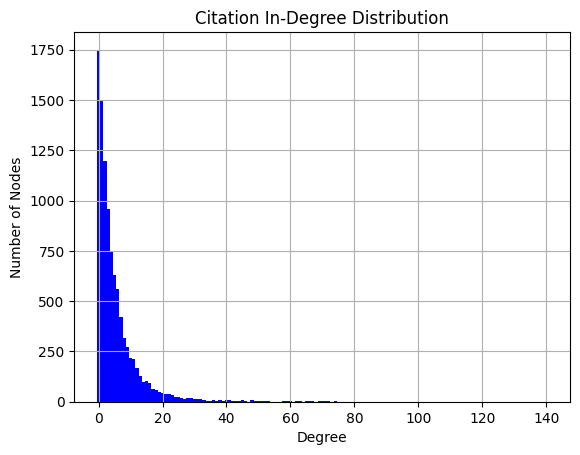

In [26]:
# Plot Degree Distribution
plt.bar(range(len(cit_degree_distribution[0])), cit_degree_distribution[0], width=1.0, color='b')
plt.title('Citation In-Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')
plt.grid(True)
plt.show()

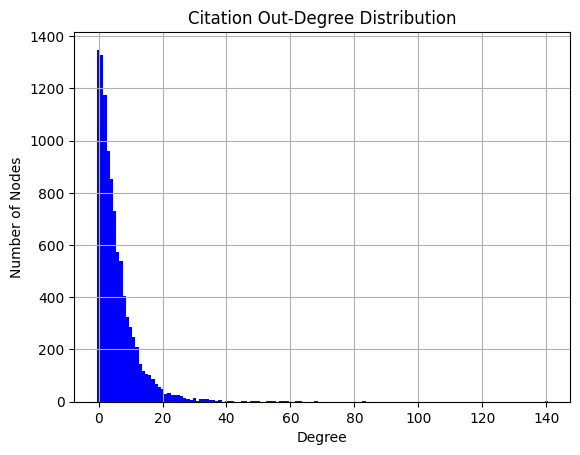

In [27]:
# Plot Degree Distribution
plt.bar(range(len(cit_degree_distribution[1])), cit_degree_distribution[1], width=1.0, color='b')
plt.title('Citation Out-Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')
plt.grid(True)
plt.show()

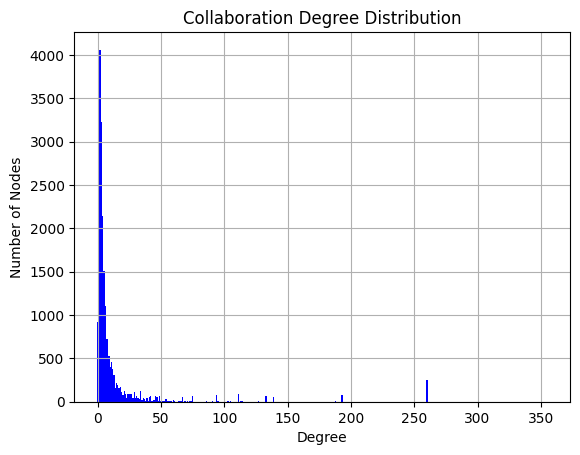

In [28]:
# Plot Degree Distribution
plt.bar(range(len(col_degree_distribution)), col_degree_distribution, width=1.0, color='b')
plt.title('Collaboration Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')
plt.grid(True)
plt.show()

#### Visualization 2 - Visualize the node's contribution

In [73]:
# randomly sample a node from citation_graph to test the functionality_2
node = random.choice(list(citation_graph.nodes))

# call functionality_2 method 
node, name, betweenness_centrality, pagerank_centrality, closeness_centrality, degree_centrality = functionality_2(citation_graph, node, 'citation_graph')

data = [
    ["Node", "Graph Name", "Betweenness Centrality", "Pagerank Centrality", "Closeness Centrality", "Degree Centrality"],
    [node, name, betweenness_centrality, pagerank_centrality, closeness_centrality, degree_centrality]
]

# Create a PrettyTable object
table = PrettyTable(data[0])

# Add data to the table
for row in data[1:]:
    table.add_row(row)

# Print the table
table

Node,Graph Name,Betweenness Centrality,Pagerank Centrality,Closeness Centrality,Degree Centrality
2153193245,citation_graph,1.4885330151315104e-06,7.156788561244922e-05,0.022149180714320052,0.001000100010001


#### Visualization 3 - Visualize the shortest-ordered route


- Print the papers needed to be crossed in the shortest walk in order
- Plot the graph and identify the nodes and edges that appear in the shortest walk (please put an identifier on each edge in the shortest walk to determine the order that we should have the walk)

IDEA: In order to simplify the visualization process, we decided to extract from the graph the first 1000 influential nodes according to their degree, and from this list randomly sample one node as the starting node, one node as the ending node, and a list of 20 nodes to define the sequence of nodes that MUST be visited in order during graph exploration.
The parameter N, defined in the functionality_3 signature, is used to extract a subgraph from the original one, but since we sample nodes randomly, if we use a subgraph it is possible that the extracted value cannot be found; although the function handles this case with asserts, we decided to work on the entire collaboration_graph, so N is set to the number of nodes in the original graph.

- Start Node: Iulian Vlad Serban
- End Node: M Donnelly
- Nodes to visit: ['Elizabeth Gerstner', 'Stefano Gustincich', 'Guojun Sheng', 'Dan Hurt', 'Eric Larsen', 'J Nchoutmboube', 'Artem S. Kasianov', 'Avi Kimchi', 'Siqian He', 'Kelly J. Hitchens', 'JS Garavelli', 'Nicola J. Mulder', 'Danso Ako-Adjei', 'Robert S. Young', 'Gregory Sizikov', 'Piero Carninci', 'Y Alam-Faruque', 'Henning Hermjakob', 'William Gulland', 'Emily J. Wood'] 

Papers to cross in the shortest walk:
 [2384495648, 1673923490, 125693051, 2099940712, 1641498739, 1641498739, 2060280062, 2172156083, 2076154138, 2108728387, 2161444669, 2157009395, 1986223165, 1986223165, 1986223165, 2157009395, 2161444669, 1880262756, 2165874743, 2117154949, 2163614729, 2168231600, 2606722458, 2606722458, 2525778437, 1895577753, 2951912364, 2384495648, 2384495648, 2949608212, 1516111018, 1528056001, 2112681514, 2036557187, 1864972570, 1501825524, 2116773335, 2163844889, 2155174176, 2772934464, 2772934464, 2155174176, 2163844889, 21167733

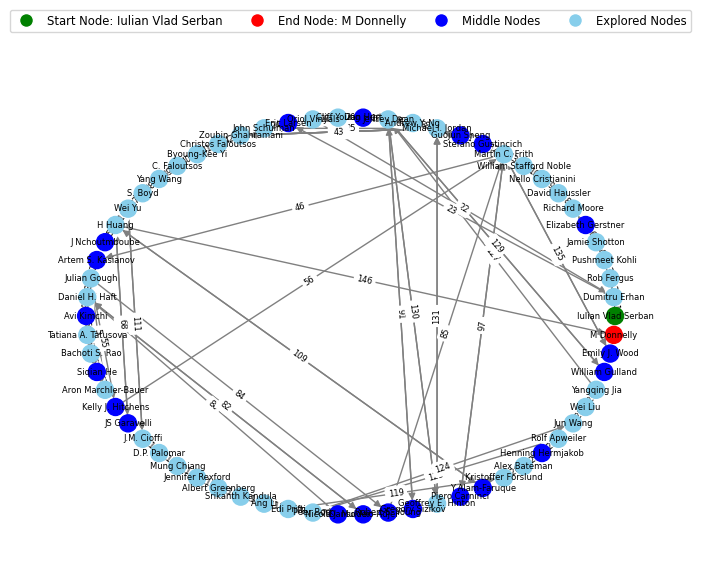

In [292]:
# Find the N nodes with greater degree
N = 1000
top_N_nodes = sorted(collaboration_graph.degree, key=lambda x: x[1], reverse=True)[:N]
top_N_authors = [author[0] for author in top_N_nodes]

# initialize the start node randomly
initial_node = random.choice(top_N_authors)
print("- Start Node:",initial_node)

# initialize the end node randomly
end_node = random.choice(top_N_authors)
print("- End Node:",end_node)

# initialize the list of nodes to visit randomly
authors_sequence = random.sample(top_N_authors, 20)
print("- Nodes to visit:", authors_sequence, "\n")


# Test the function with the sample data
result = functionality_3(collaboration_graph, authors_sequence, initial_node, end_node, nx.number_of_nodes(collaboration_graph)) # N = number of nodes of the graph

# Check if there is a path between initial and end nodes
if result == "There is no such path.": # if there is not a path, print the message
    print(result)

else: # if the path exists
    nodes_path, list_papers = result # extract the path of nodes and the sequenze of papers

    # print the sequence of papers as required
    print("Papers to cross in the shortest walk:\n",list_papers)

    # Create an empty undirected Multi-Graph and fill it with the nodes in the path and relative edges
    graph = nx.MultiDiGraph()
    for idx in range(len(nodes_path) - 1):
        graph.add_edge(nodes_path[idx], nodes_path[idx + 1])

    # define a layout for the graph plot
    pos = nx.circular_layout(graph)

    # Color nodes: green for start node, red for end node, blue for nodes to visit, skyblue for other nodes explored 
    node_colors = [
        'green' if node == initial_node else
        'red' if node == end_node else
        'blue' if node in authors_sequence else
        'skyblue' for node in graph.nodes
    ]   

    # Visualize the graph with sequential numbers on edges and colored nodes
    nx.draw(graph, pos=pos, with_labels=True, font_size=6, font_color='black', node_size=150, node_color=node_colors, edge_color="gray")

    # Annotate edges with sequential numbers to show the visiting order 
    edge_labels = {(nodes_path[idx], nodes_path[idx + 1]): idx + 1 for idx in range(len(nodes_path) - 1)}
    nx.draw_networkx_edge_labels(graph, pos=pos, edge_labels=edge_labels, font_color='black', font_size=6)

 
    # Create a legend in the plot 
    legend_labels = [f'Start Node: {initial_node}', f'End Node: {end_node}', 'Middle Nodes', 'Explored Nodes']
    legend_colors = ['green', 'red', 'blue', 'skyblue']  
    legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10) for label, color in zip(legend_labels, legend_colors)]
    plt.legend(handles=legend_handles, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=len(legend_labels), fontsize='small')

    plt.show()



#### Visualization 4 - Visualize the disconnected graph


- Print the number of the links that should be disconnected
- Plot the original graph
- Plot the graph after removing the links and identify the two nodes

In [304]:
# Extract the top N nodes according to their degree
top_N_authors = sorted(collaboration_graph.degree, key=lambda x: x[1], reverse=True)[:30]
top_N_nodes = [author[0] for author in top_N_authors]

# randomly sample a node for authorA and one for authorB from the top N nodes
authorA = random.choice(top_N_nodes)
authorB = random.choice(top_N_nodes)

min_cut, original_graph, modified_graph = functionality_4(collaboration_graph, authorA, authorB, 30)

- Print the number of the links that should be disconnected

In [305]:
print(f"- Number of edges to remove to disconnect {authorA} and {authorB}:", min_cut)
print(f"- Node {authorA} and {authorB} are now connected?", nx.has_path(modified_graph, authorA, authorB))

- Number of edges to remove to disconnect Marina Lizio and Carrie A. Davis: 57
- Node Marina Lizio and Carrie A. Davis are now connected? False


- Plot the original graph

- Original graph: Graph with 30 nodes and 435 edges


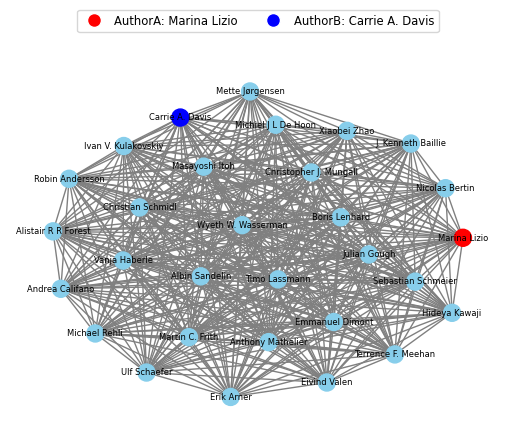

In [310]:
print("- Original graph:", original_graph)

# define a layout for the graph plot
pos = nx.spring_layout(original_graph)

# Color nodes: red for start node, blue for end node, skyblue for other nodes
node_colors = [
    'red' if node == authorA else
    'blue' if node == authorB else
    'skyblue' for node in original_graph.nodes
    ]   

# Create a legend in the plot 
legend_labels = [f'AuthorA: {authorA}', f'AuthorB: {authorB}']
legend_colors = ['red', 'blue']  
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10) for label, color in zip(legend_labels, legend_colors)]
plt.legend(handles=legend_handles, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=len(legend_labels), fontsize='small')

# Visualize the graph with sequential numbers on edges and colored nodes
nx.draw(original_graph, pos=pos, with_labels=True, font_size=6, font_color='black', node_size=150, node_color=node_colors, edge_color="gray")

- Plot the graph after removing the links and identify the two nodes

- Modified graph: Graph with 30 nodes and 378 edges


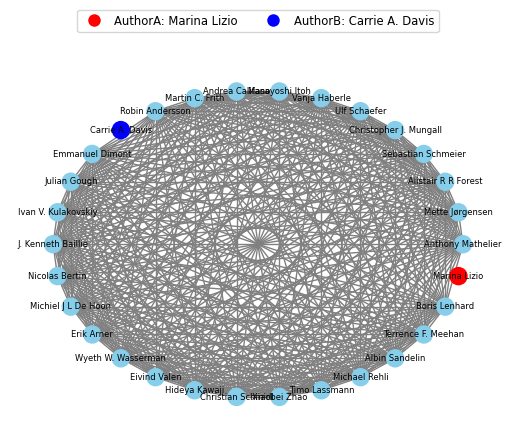

In [308]:
print("- Modified graph:", modified_graph)

# Define a layout for the graph plot
pos = nx.circular_layout(modified_graph)

# Color nodes: red for start node, blue for end node, skyblue for other nodes
node_colors = [
    'red' if node == authorA else
    'blue' if node == authorB else
    'skyblue' for node in modified_graph.nodes
    ]  

# Create a legend in the plot 
legend_labels = [f'AuthorA: {authorA}', f'AuthorB: {authorB}']
legend_colors = ['red', 'blue']  
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10) for label, color in zip(legend_labels, legend_colors)]
plt.legend(handles=legend_handles, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=len(legend_labels), fontsize='small')


# Visualize the graph with sequential numbers on edges and colored nodes
nx.draw(modified_graph, pos=pos, with_labels=True, font_size=6, font_color='black', node_size=150, node_color=node_colors, edge_color="gray")

#### Visualization 5 - Visualize the communities

- Print the number of links that should be removed to have the communities
- A table depicting the communities and the papers that belong to each community
- Plot the original graph
- Plot the graph showing the communities in the network
- Plot the final graph and identify the community/communities of Paper_1 and Paper_2

In [311]:
import random

# find the largest connected component and then choose the paper1 and paper2 at random
graph = citation_graph.to_undirected()

# Extract the top N authors and create a subgraph of the collaboration graph
top_N_authors = sorted(graph.degree, key=lambda x: x[1], reverse=True)[:500]
top_N_nodes = [author[0] for author in top_N_authors]
graph = graph.subgraph(top_N_nodes)

# Find the largest connected component 
connected_components = list(nx.connected_components(graph))
largest_connected_component = max(connected_components, key=len)
largest_connected_subgraph = graph.subgraph(largest_connected_component)

paper1 = random.choice(list(largest_connected_subgraph.nodes))
paper2 = random.choice(list(largest_connected_subgraph.nodes))

# call the functionality_5 method to retrive required informations
number_edges, community_list, same_community, original_graph, modified_graph = functionality_5(citation_graph, paper1, paper2, 500)

- Print the number of links that should be removed to have the communities

In [312]:
print("- Number of links removed:", number_edges)

- Number of links removed: 20


- A table depicting the communities and the papers that belong to each community

In [313]:
community1 = community_list[0]
community2 = community_list[1]

data = [
    ["Community 1", "Community 2"],
    [community1, community2]
]

# Create a PrettyTable object
table = PrettyTable(data[0])

# Add data to the table
for row in data[1:]:
    table.add_row(row)

# Print the table
table


+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

- Plot the original graph

Graph with 461 nodes and 2741 edges


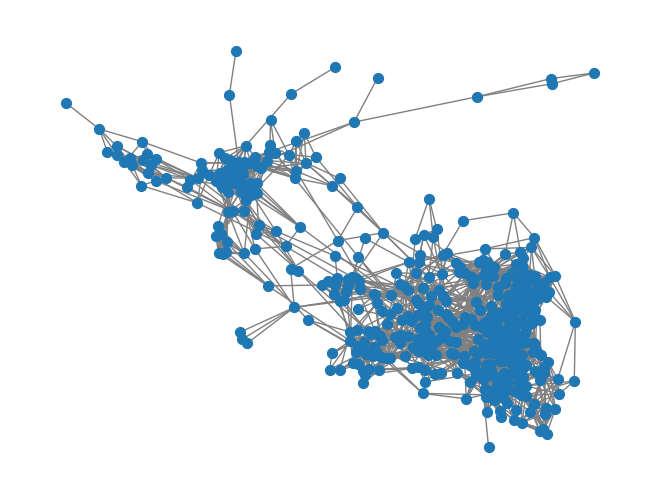

In [320]:
print(original_graph)

pos = nx.spring_layout(original_graph)  
nx.draw(original_graph, pos, with_labels=False, node_size=50, edge_color="gray")  
plt.show()

- Plot the graph showing the communities in the network

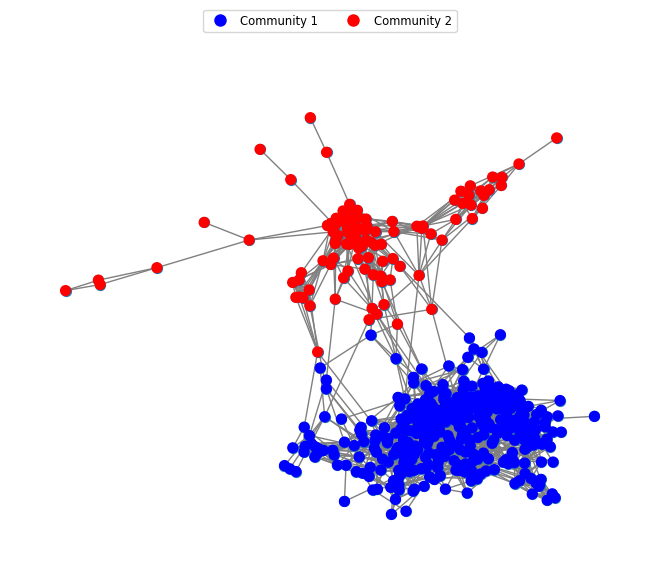

In [337]:
community1 = community_list[0] # list of nodes that belong to community 1
community2 = community_list[1] # list of nodes that belong to community 2

pos = nx.spring_layout(original_graph)
nx.draw(original_graph, pos, with_labels=False, node_size=50, edge_color='gray')

# Color the nodes to distinguish different communities
node_colors = ['blue' if node in community1 else 'red' if node in community2 else "skyblue" for node in original_graph.nodes]
nx.draw_networkx_nodes(original_graph, pos, node_color=node_colors, node_size=50)

# Create a legend in the plot 
legend_labels = ['Community 1', 'Community 2']
legend_colors = ['blue', 'red']  
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10) for label, color in zip(legend_labels, legend_colors)]
plt.legend(handles=legend_handles, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=len(legend_labels), fontsize='small')

plt.show()

- Plot the final graph and identify the community/communities of Paper_1 and Paper_2

Graph with 461 nodes and 2721 edges
Papers 2148043549 and 2066636486 are in the same community? False


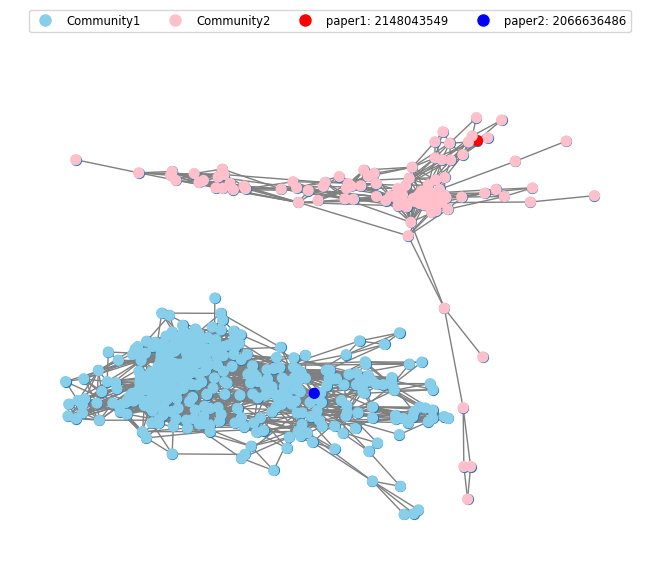

In [355]:
# Plot the communities and identify papar1 and paper2
print(modified_graph)
print(f"Papers {paper1} and {paper2} are in the same community?", same_community)


# extract nodes of community 1 and community 2
community1 = community_list[0]
community2 = community_list[1]

# If they are in the same community
if same_community:
    pos = nx.spring_layout(modified_graph)
    nx.draw(modified_graph, pos, with_labels=False, node_size=50, edge_color='gray')

    if paper1 in community1 and paper2 in community1: # both are in community 1
        # Highlight paper1 and paper2 with specific colors
        node_colors = ['blue' if node == paper1 else 'darkblue' if node == paper2 else "skyblue" if node in community1 else "pink" for node in modified_graph.nodes]
        nx.draw_networkx_nodes(modified_graph, pos, node_color=node_colors, node_size=50)

        # Create a legend in the plot 
        legend_labels = ['Community1', 'Community2', f'paper1: {paper1}', f'paper2: {paper2}']
        legend_colors = ['skyblue', 'pink', 'blue', 'darkblue']  
        legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10) for label, color in zip(legend_labels, legend_colors)]
        plt.legend(handles=legend_handles, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=len(legend_labels), fontsize='small')

    else: # both are in community 2
        # Highlight paper1 and paper2 with specific colors
        node_colors = ['red' if node == paper1 else 'darkred' if node == paper2 else "pink" if node in community2 else "skyblue" for node in modified_graph.nodes]
        nx.draw_networkx_nodes(modified_graph, pos, node_color=node_colors, node_size=50)

        # Create a legend in the plot 
        legend_labels = ['Community1', 'Community2', f'paper1: {paper1}', f'paper2: {paper2}']
        legend_colors = ['skyblue', 'pink', 'red', 'darkred']  
        legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10) for label, color in zip(legend_labels, legend_colors)]
        plt.legend(handles=legend_handles, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=len(legend_labels), fontsize='small')


else: # paper1 and paper2 not in the same community
    pos = nx.spring_layout(modified_graph)
    nx.draw(modified_graph, pos, with_labels=False, node_size=50, edge_color='gray')

    if paper1 in community1:
        # Highlight paper1 and paper2 with specific colors
        node_colors = ['blue' if node == paper1 else 'red' if node == paper2 else "skyblue" if node in community1 else "pink" for node in modified_graph.nodes]
        nx.draw_networkx_nodes(modified_graph, pos, node_color=node_colors, node_size=50)

        # Create a legend in the plot 
        legend_labels = ['Community1', 'Community2', f'paper1: {paper1}', f'paper2: {paper2}']
        legend_colors = ['skyblue', 'pink', 'blue', 'red']  
        legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10) for label, color in zip(legend_labels, legend_colors)]
        plt.legend(handles=legend_handles, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=len(legend_labels), fontsize='small')
    
    else: 
        # Highlight paper1 and paper2 with specific colors
        node_colors = ['red' if node == paper1 else 'blue' if node == paper2 else "skyblue" if node in community1 else "pink" for node in modified_graph.nodes]
        nx.draw_networkx_nodes(modified_graph, pos, node_color=node_colors, node_size=50)

        # Create a legend in the plot 
        legend_labels = ['Community1', 'Community2', f'paper1: {paper1}', f'paper2: {paper2}']
        legend_colors = ['skyblue', 'pink', 'red', 'blue']  
        legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10) for label, color in zip(legend_labels, legend_colors)]
        plt.legend(handles=legend_handles, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=len(legend_labels), fontsize='small')

plt.show()


## 4. Command Line Question (CLQ)

For the first question about the most important connector nodes we used the criteria of the Degree centrality: we computed the degree centrality for each node in the citation graph and we identified the top 10 nodes with the highest degree centrality.

For the second question about the analysis of how the citation degree varies among nodes in the graph, we used the distribution of degrees (in-degrees and out-degrees). The in-degree are the number of incoming edges and the out-degree of the outgoing edges. The output shows two lists of in-degrees and out-degrees, counting the occurrences of each degree.

Finally, for the third question about the average shortest path length the script employed the NetworkX library in Python to create a directed graph from the extracted edges. We used the NetworkX function to identify the largest strongly connected component in the graph, that is basically a subset of nodes. From this subgraph we calculated the average shortest path length within the largest strongly connected component, that is an important metrics to quantify the efficiency of information within the network.

Here there is the screenshot of the output of the CommandLine.sh in the Git Bash terminal:

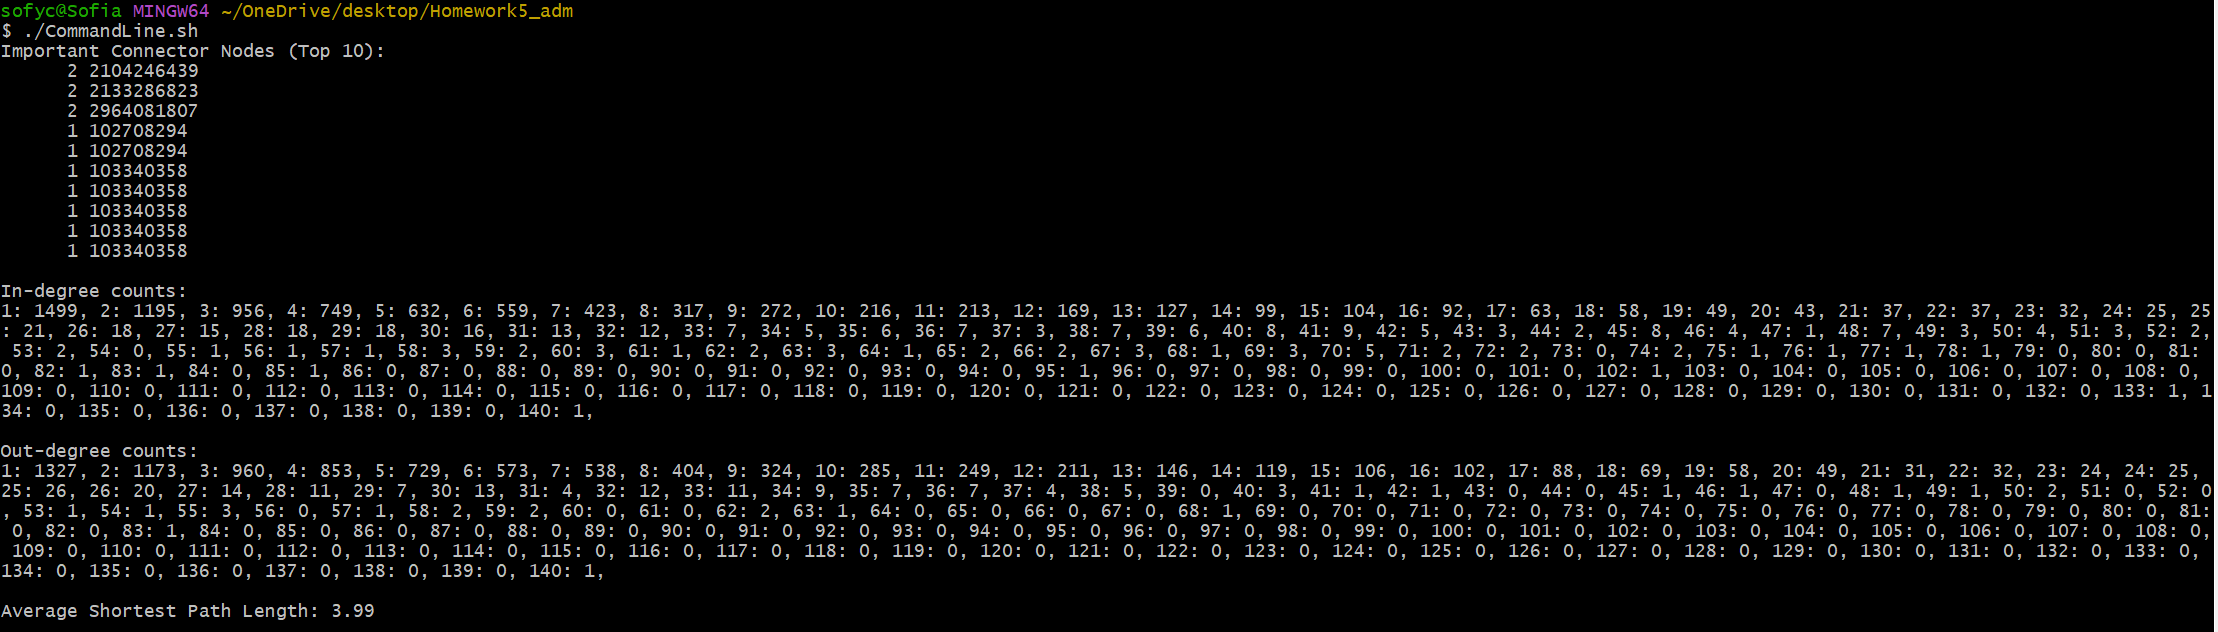